In [23]:
import numpy as np
import pandas as pd
import requests
import time

In [24]:
API_KEY = "446fc08b8094898aca73c6fbade26d44"

In [38]:
cities = [
    "New York", "Los Angeles", "Chicago", "Houston", "Phoenix",
    "London", "Manchester", "Birmingham", "Glasgow", "Liverpool",
    "Toronto", "Vancouver", "Montreal", "Calgary", "Ottawa",
    "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide",
    "Paris", "Marseille", "Lyon", "Toulouse", "Nice",
    "Berlin", "Munich", "Frankfurt", "Hamburg", "Cologne",
    "Rome", "Milan", "Naples", "Turin", "Palermo",
    "Madrid", "Barcelona", "Valencia", "Seville", "Zaragoza",
    "Beijing", "Shanghai", "Guangzhou", "Shenzhen", "Chengdu",
    "Tokyo", "Osaka", "Yokohama", "Nagoya", "Sapporo",
    "Delhi", "Mumbai", "Bangalore", "Hyderabad", "Chennai",
    "Cairo", "Alexandria", "Giza", "Luxor", "Aswan",
    "Moscow", "Saint Petersburg", "Novosibirsk", "Yekaterinburg", "Kazan",
    "São Paulo", "Rio de Janeiro", "Brasília", "Salvador", "Fortaleza",
    "Buenos Aires", "Córdoba", "Rosario", "Mendoza", "La Plata",
    "Cape Town", "Johannesburg", "Pretoria", "Durban", "Bloemfontein",
    "Nairobi", "Mombasa", "Kisumu", "Eldoret", "Nakuru",
    "Istanbul", "Ankara", "Izmir", "Bursa", "Adana",
    "Seoul", "Busan", "Incheon", "Daegu", "Daejeon",
    "Jakarta", "Surabaya", "Bandung", "Medan", "Bekasi"
]

In [39]:
weather_data = []

In [40]:
for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        weather = {
            "City": city,
            "Temprature": data["main"].get("temp"),
            "Humidity": data["main"].get("humidity"),
            "Pressure": data["main"].get("pressure"),
            "Condition": data["weather"][0].get("description")
        }
        weather_data.append(weather)
    else:
        print("Failed to get data for {city}. Status code: {response.status_code}")

    time.sleep(1)

In [41]:
df = pd.DataFrame(weather_data)

In [45]:
df

,City,Temprature,Humidity,Pressure,Condition
0,New York,30.04,76,1014,broken clouds
1,Los Angeles,24.94,56,1015,clear sky
2,Chicago,25.14,62,1017,overcast clouds
3,Houston,31.87,58,1017,few clouds
4,Phoenix,38.55,25,1012,clear sky
...,...,...,...,...,...
95,Jakarta,27.95,76,1011,moderate rain
96,Surabaya,25.56,93,1013,clear sky
97,Bandung,26.95,82,1014,overcast clouds
98,Medan,23.54,93,1011,overcast clouds


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

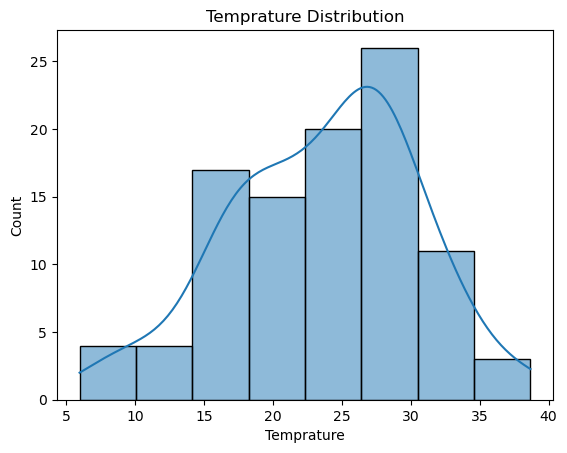

In [49]:
sns.histplot(df["Temprature"], kde=True)
plt.title("Temprature Distribution")
plt.show

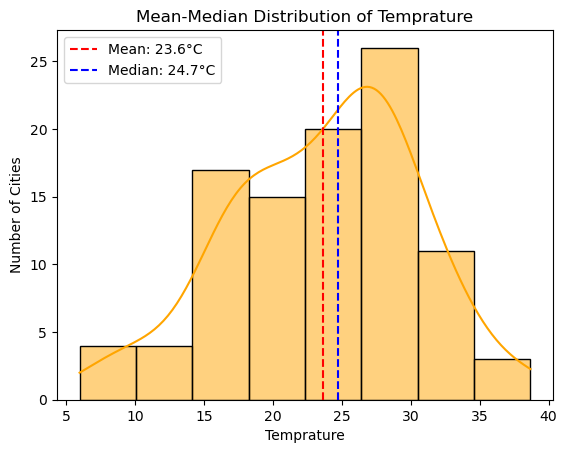

In [59]:
mean_temp = df["Temprature"].mean()
median_temp = df["Temprature"].median()

sns.histplot(df["Temprature"], kde= True, color="Orange")
plt.axvline(mean_temp, color="red",linestyle="--", label=f"Mean: {mean_temp:.1f}°C")
plt.axvline(median_temp, color="blue",linestyle="--", label=f"Median: {median_temp:.1f}°C")
plt.title("Mean-Median Distribution of Temprature")
plt.xlabel("Temprature")
plt.ylabel("Number of Cities")
plt.legend()
plt.show()

In [64]:
Coldest = df[df["Temprature"] == df["Temprature"].min()]
Hottest = df[df["Temprature"] == df["Temprature"].max()]
print("Coldest City:\n", Coldest)
print("\n")
print("Hottest City:\n", Hottest)

Coldest City:
             City  Temprature  Humidity  Pressure  Condition
79  Bloemfontein        5.98        39      1031  clear sky


Hottest City:
      City  Temprature  Humidity  Pressure   Condition
59  Aswan       38.68        10      1003  few clouds


In [90]:
from sklearn.model_selection import train_test_split
X = df[["Humidity","Pressure"]]
y = df["Temprature"]

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [92]:
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        
X_test 

array([[ 0.80296926,  0.78801215],
       [ 0.33186604,  0.51576227],
       [ 0.75585894, -1.117737  ],
       [ 1.36829311,  0.24351239],
       [ 0.14342476, -0.70936218],
       [-1.92942939,  2.42151142],
       [-0.23345782, -0.02873749],
       [ 0.04920411,  0.37963733],
       [ 1.13274151,  1.33251191],
       [ 0.09631443,  1.06026203]])

In [99]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

prediction = clf.predict(X_test)

In [100]:
prediction

array([24.86657843, 24.40060053, 23.66089346, 24.88820423, 23.52547641,
       24.14611366, 23.70704013, 24.13781215, 25.4111417 , 24.5875707 ])

In [101]:
print("Predicted:", prediction)
print("Actual:   ", y_test.values)

Predicted: [24.86657843 24.40060053 23.66089346 24.88820423 23.52547641 24.14611366
 23.70704013 24.13781215 25.4111417  24.5875707 ]
Actual:    [16.69 20.9  15.97 21.39 18.04 29.57 10.59 20.1  24.06 36.35]


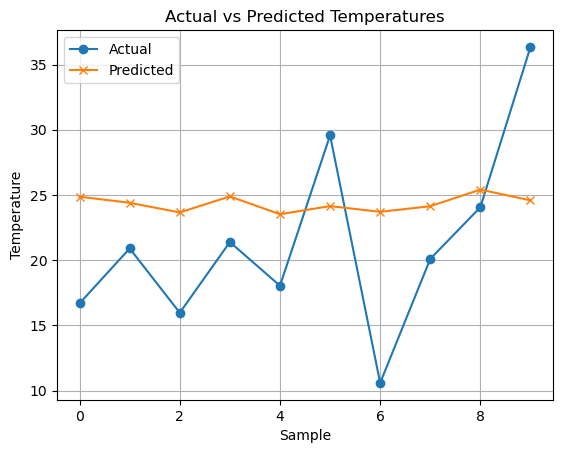

In [110]:
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(prediction, label='Predicted', marker='x')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Sample")
plt.ylabel("Temperature")
plt.legend()
plt.grid()
plt.show()


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
rmse = mse ** 0.5
r2 = r2_score(y_test, prediction)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Absolute Error (MAE): 6.40
Mean Squared Error (MSE): 53.85


In [111]:
import pickle

In [114]:
pickle.dump(clf,open('Temperature_model.pkl','wb'))

In [113]:
df.to_csv("weather_dataset.csv", index=False)